## Initial Explorations

- DTI has a big outlier
- Data represents more successful loans.
- Data represents loans between 2007~-2016


In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
import numpy as np

from src.util_functions import get_feature_description

In [2]:
# Read initial csv with data
raw_df = pd.read_csv('datasets/lending_club_loan_two.csv')


In [3]:
# Lets look through columns to see what we are working with.
raw_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [4]:
raw_df.shape

(396030, 27)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
raw_df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


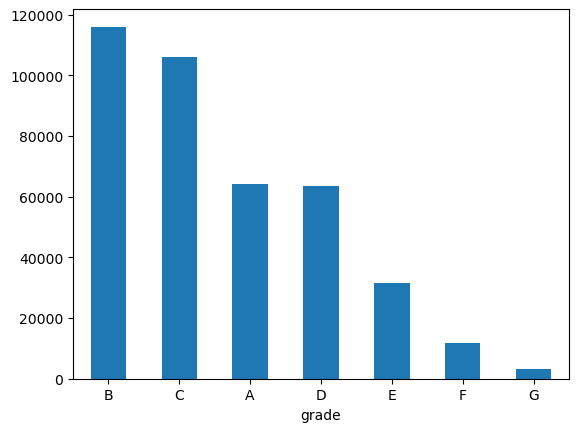

In [7]:
# Check distribution of data, is it more or less focused on certain types of loans?
raw_df.grade.value_counts().plot.bar('grade')
plt.xticks(rotation=0)
plt.show()

In [8]:
# Understanding the time frame of the data
raw_df.issue_d.sort_values().unique()

array(['Apr-2008', 'Apr-2009', 'Apr-2010', 'Apr-2011', 'Apr-2012',
       'Apr-2013', 'Apr-2014', 'Apr-2015', 'Apr-2016', 'Aug-2007',
       'Aug-2008', 'Aug-2009', 'Aug-2010', 'Aug-2011', 'Aug-2012',
       'Aug-2013', 'Aug-2014', 'Aug-2015', 'Aug-2016', 'Dec-2007',
       'Dec-2008', 'Dec-2009', 'Dec-2010', 'Dec-2011', 'Dec-2012',
       'Dec-2013', 'Dec-2014', 'Dec-2015', 'Dec-2016', 'Feb-2008',
       'Feb-2009', 'Feb-2010', 'Feb-2011', 'Feb-2012', 'Feb-2013',
       'Feb-2014', 'Feb-2015', 'Feb-2016', 'Jan-2008', 'Jan-2009',
       'Jan-2010', 'Jan-2011', 'Jan-2012', 'Jan-2013', 'Jan-2014',
       'Jan-2015', 'Jan-2016', 'Jul-2007', 'Jul-2008', 'Jul-2009',
       'Jul-2010', 'Jul-2011', 'Jul-2012', 'Jul-2013', 'Jul-2014',
       'Jul-2015', 'Jul-2016', 'Jun-2007', 'Jun-2008', 'Jun-2009',
       'Jun-2010', 'Jun-2011', 'Jun-2012', 'Jun-2013', 'Jun-2014',
       'Jun-2015', 'Jun-2016', 'Mar-2008', 'Mar-2009', 'Mar-2010',
       'Mar-2011', 'Mar-2012', 'Mar-2013', 'Mar-2014', 'Mar-20

## Datatype conversions

In [9]:
# Term should be an int we can work with.
get_feature_description('term')

                                                                            Description
1  The number of payments on the loan. Values are in months and can be either 36 or 60.


In [10]:
raw_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [11]:
# take month out of the column name.
raw_df.term = raw_df.term.apply(lambda x: x.split(' ')[1])
raw_df.term.unique()

array(['36', '60'], dtype=object)

## Is there any relationships we can highlight that may help us reduce % of charged off loans using borrower credit profile?
We will explore various features that relate to credit profile that may be a cause of more charge-offs.



In [12]:
# Lets look at our chargeoffs
raw_df.loan_status.value_counts()



loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

In [13]:
# As a percentage now.
100 * (raw_df['loan_status'].value_counts()/raw_df['loan_status'].value_counts().sum())

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: count, dtype: float64

### Loan Status vs DTI
We will perform a comparison after excluding any loans with debt-to-income ratios (DTIs) exceeding 70, as these are generally associated with incomplete applications in the industry and are often flagged by loan officers as obvious candidates for denial. It is common for some entries to have placeholder figures such as 999 or 9999, or any value above 70, as recorded by the loan officer. This adjustment will enable a more accurate analysis of the influence on Loan State.

- Within the boxplot and violinplot, we can see medians and middle spread (25-75 quartiles) higher for the charge-off categories as DTI increases.
- The violinplot further shows us how wide the values can range at higher dtis and narrower than it's fully paid counter part which narrows at the top and widens as you go lower.
- After binning DTI into 2 categories to better represent a higher DTI, assumption that DTI raising might be linked to higher charge-offs is debunked. Will still check the statistical significance given the actual DTI's without binning might still hold merit.

Further statistical analysis needs to be done to confirm findings

In [14]:
raw_df.query("dti > 70")['dti'].nunique()

13

In [15]:
raw_df.loc[raw_df.dti < 70][['loan_status', 'dti']].groupby('loan_status').median()

,dti
loan_status,
Charged Off,19.34
Fully Paid,16.34


In [16]:
raw_df.loc[raw_df.dti < 70][['loan_status', 'dti']].groupby('loan_status').quantile([.25,.5,.75])

dti
loan_status            
Charged Off 0.25  13.33
            0.50  19.34
            0.75  25.55
Fully Paid  0.25  10.87
            0.50  16.34
            0.75  22.29

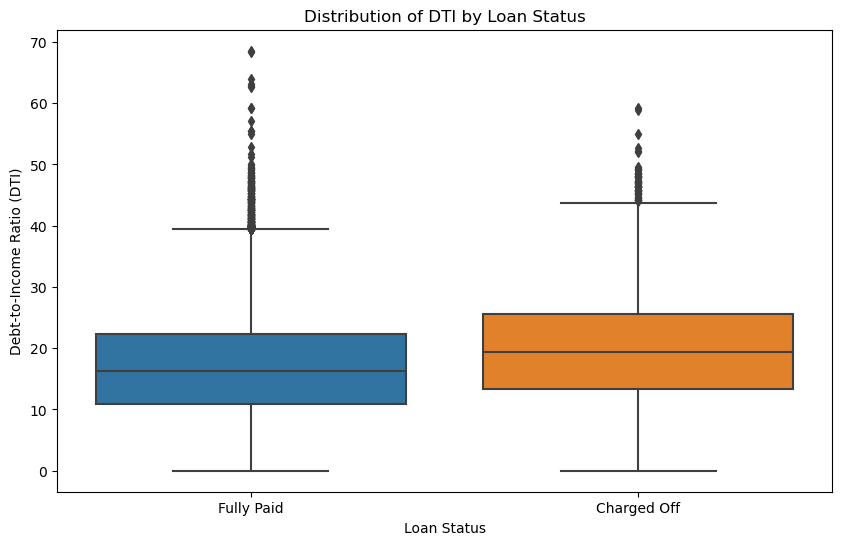

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=raw_df.loc[raw_df['dti'] < 70], x='loan_status', y='dti')

ax.set_title('Distribution of DTI by Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Debt-to-Income Ratio (DTI)')
ax.set_xticklabels(['Fully Paid', 'Charged Off'])

plt.show()

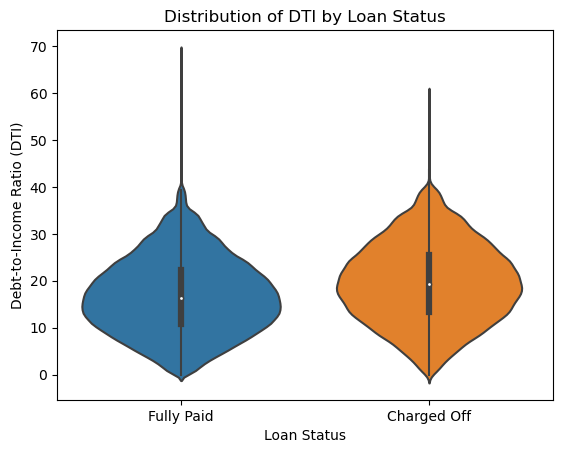

In [18]:
ax = sns.violinplot(data=raw_df.loc[raw_df['dti'] < 70], x='loan_status', y='dti')

ax.set_title('Distribution of DTI by Loan Status')
ax.set_xlabel('Loan Status')
ax.set_ylabel('Debt-to-Income Ratio (DTI)')
ax.set_xticklabels(['Fully Paid', 'Charged Off'])

plt.show()

In [19]:
# Perhaps comparing them as categorical might be more relevant given the under-representation of charged-off loans.

bins = [0, 22.65, float('inf')]

labels = ['lower_dti', 'higher_dti']

raw_df['dti_category'] = pd.cut(raw_df['dti'], bins=bins, labels=labels, right=False)

raw_df[['loan_status', 'dti', 'dti_category']]

raw_df.dti_category.value_counts()

dti_category
lower_dti     292369
higher_dti    103661
Name: count, dtype: int64

c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


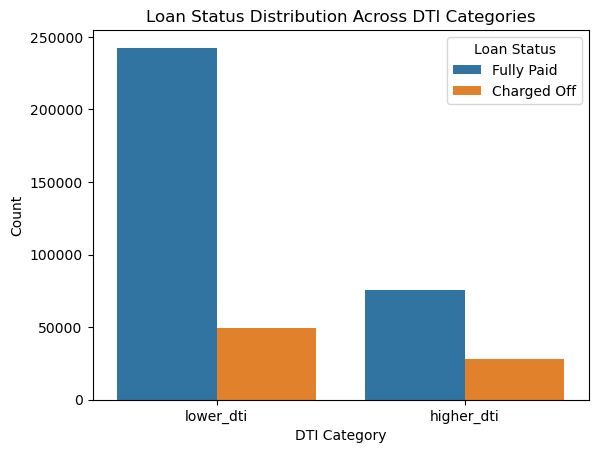

In [20]:
# Create a bar plot
ax = sns.countplot(data=raw_df, x='dti_category', hue='loan_status')

ax.set_title('Loan Status Distribution Across DTI Categories')
ax.set_xlabel('DTI Category')
ax.set_ylabel('Count')
ax.legend(title='Loan Status')

plt.show()

### Loan Status vs Annual Income
Given the amount of variance in income levels due to borrower error in application, oversight of loan officers/underwriters & filler data that represents potential dead deals, binning the data allows us to conserve the remaining columns that provide additional data points in our already under-represented charge-off's.

I binned the data based on 2024 income tax brackets to better visualize the differences between income brackets vs loan status

- Per the count plot, from the bulk of our data and to the right as income increases, the charge offs get lower.

Need to statistically confirm validity

In [21]:
raw_df.query('annual_inc > 250000').count()


loan_amnt               3297
term                    3297
int_rate                3297
installment             3297
grade                   3297
sub_grade               3297
emp_title               3121
emp_length              3269
home_ownership          3297
annual_inc              3297
verification_status     3297
issue_d                 3297
loan_status             3297
purpose                 3297
title                   3290
dti                     3297
earliest_cr_line        3297
open_acc                3297
pub_rec                 3297
revol_bal               3297
revol_util              3288
total_acc               3297
initial_list_status     3297
application_type        3297
mort_acc                3013
pub_rec_bankruptcies    3294
address                 3297
dti_category            3297
dtype: int64

In [22]:
# Lets try binning income based on tax brackets to avoid dropping valuable rows by removing outliers. 

bins = [0, 11600, 47150, 100525, 191950, 243725, 609350, float('inf')]

labels = ['0-11600', '11601-47150', '47151-100525', '100526-191950', '191951-243725', '243726-609350', '609351 or more']

raw_df['annual_inc_lvl'] = pd.cut(raw_df['annual_inc'], bins=bins, labels=labels, right=False)

c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


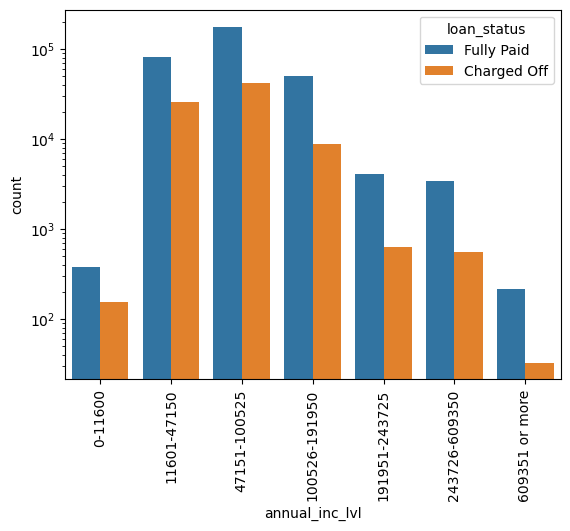

In [23]:
ax = sns.countplot(data=raw_df, x='annual_inc_lvl', hue='loan_status')
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

### Loan Status vs DTI & Annual Income
- Across the income bins, the higher the dti goes, the box plot shows charge-offs have the bulk of its inter-quartile distributions higher than its respective counter-part in fully paid. 
- Used < 70 again as I did above. Reasoning under Loan Status vs DTI Markdown. 



c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


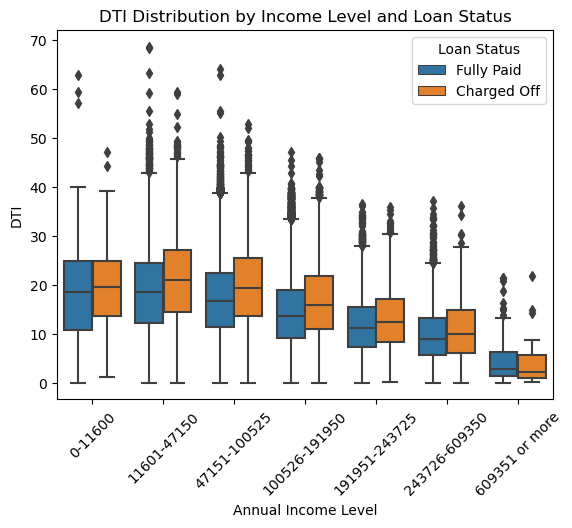

In [24]:
sns.boxplot(x='annual_inc_lvl', y='dti', data=raw_df.loc[raw_df['dti'] < 70], hue='loan_status')
plt.title('DTI Distribution by Income Level and Loan Status')
plt.xlabel('Annual Income Level')
plt.ylabel('DTI')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

### Loan Status vs Loan Amount & Annual Income
- Visually we observe that as the income brackets increase, loan amounts tend to increase as well and throughout each bracket, the median charge-offs are higher than the median fully paid loans.


c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\Users\saad\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


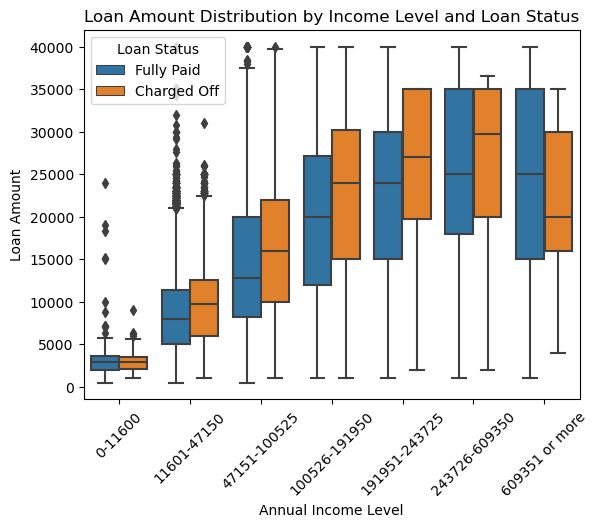

In [25]:
sns.boxplot(x='annual_inc_lvl', y='loan_amnt', data=raw_df, hue='loan_status')
plt.title('Loan Amount Distribution by Income Level and Loan Status')
plt.xlabel('Annual Income Level')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

### Loan Status vs Loan Amount
- Higher median of charged off loans and the distribution of values is higher as well. Worth exploring further. 

In [26]:
raw_df[['loan_status', 'loan_amnt' ]]

,loan_status,loan_amnt
0,Fully Paid,10000.0
1,Fully Paid,8000.0
2,Fully Paid,15600.0
3,Fully Paid,7200.0
4,Charged Off,24375.0
...,...,...
396025,Fully Paid,10000.0
396026,Fully Paid,21000.0
396027,Fully Paid,5000.0
396028,Fully Paid,21000.0


In [27]:
raw_df.groupby('loan_status')['loan_amnt'].mean()

loan_status
Charged Off    15126.300967
Fully Paid     13866.878771
Name: loan_amnt, dtype: float64

In [28]:
raw_df.loan_amnt.max()

40000.0

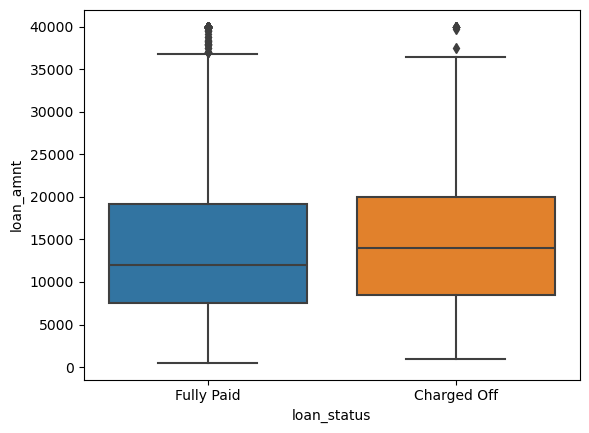

In [29]:
# Higher median of charged off loans and the distribution of values is higher as well. Worth exploring further. 
sns.boxplot(data=raw_df, x='loan_status', y='loan_amnt')
plt.show()

### Loan Status vs Loan Term
- No valuable information found to supports our claim.

In [30]:
raw_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'dti_category',
       'annual_inc_lvl'],
      dtype='object')

In [31]:
raw_df.term.value_counts()

term
36    302005
60     94025
Name: count, dtype: int64

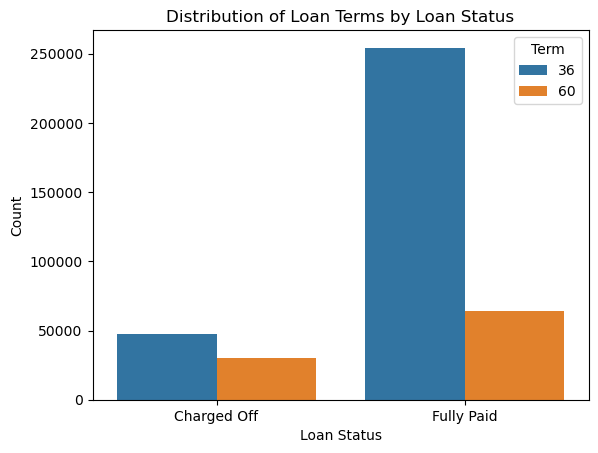

In [32]:

sns.barplot(data=raw_df.groupby('loan_status')['term'].value_counts().reset_index(name='count'), x='loan_status', y='count', hue='term')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Terms by Loan Status')
plt.legend(title='Term')
plt.show()

### Loan Status vs Application Type
- Not enough data for charge off joint apps, will explore other features.

In [33]:
get_feature_description('application_type')


                                                                                             Description
25  Indicates whether the loan is an individual application or a joint application with two co-borrowers


In [34]:
raw_df.application_type.value_counts()   

application_type
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: count, dtype: int64

In [35]:
raw_df[['loan_status', 'application_type' ]].value_counts().reset_index().sort_values(by='loan_status')


,loan_status,application_type,count
1,Charged Off,INDIVIDUAL,77517
4,Charged Off,DIRECT_PAY,102
5,Charged Off,JOINT,54
0,Fully Paid,INDIVIDUAL,317802
2,Fully Paid,JOINT,371
3,Fully Paid,DIRECT_PAY,184


### Loan Status vs Homeownership
- The amount of Other/none/any answers is insignificant given the amount of data we have. 
- For visual sake and to avoid losing any import feature data, we will map the values to Mortgage, the one that has the highest frequency. Given such a small number of rows that contain this information, it will not make any significant impact.

There is slightly higher value of rent charge-offs compared to mortgage and own, worth exploring statistical significance.


In [36]:
raw_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'dti_category',
       'annual_inc_lvl'],
      dtype='object')

In [37]:
get_feature_description('home_ownership')

                                                                                                                                             Description
8  The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [45]:
raw_df.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [51]:
raw_df['home_ownership'] = raw_df['home_ownership'].apply(lambda x: 'MORTGAGE' if x in ['OTHER', 'NONE', 'ANY'] else x)

In [59]:
raw_df[['home_ownership', 'loan_status']].value_counts().reset_index()

,home_ownership,loan_status,count
0,MORTGAGE,Fully Paid,164839
1,RENT,Fully Paid,123578
2,RENT,Charged Off,36212
3,MORTGAGE,Charged Off,33655
4,OWN,Fully Paid,29940
5,OWN,Charged Off,7806


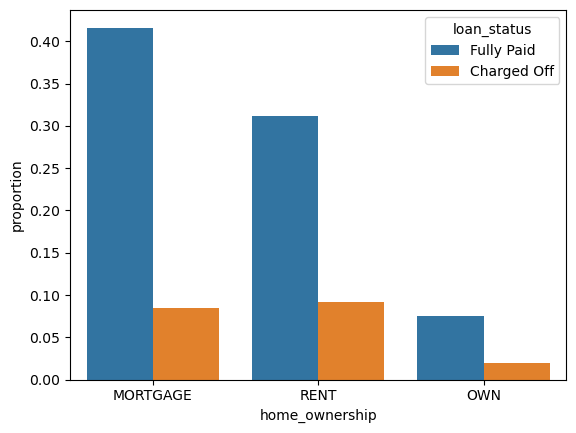

In [77]:
sns.barplot(raw_df[['home_ownership', 'loan_status']].value_counts(normalize=True).reset_index(), x='home_ownership', y='proportion', hue='loan_status')
plt.show()